In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
os.chdir(r'C:\Users\gaura\OneDrive\Desktop')

In [4]:
df=pd.read_csv('forecast_data.csv')

In [5]:
df

,Name,Date,time,Maximum_Temperature,Minimum_Temperature,Temperature,Wind_Speed,Wind_Direction,Cloud_Cover,Relative_Humidity,Conditions
0,"Pune, MH, India",feb 17 2021,06:30:00,87.3,85.0,86.3,2.6,29.2,10.3,22.3,Clear
1,"Pune, MH, India",feb 17 2021,18:30:00,80.5,66.8,70.0,4.1,52.9,45.8,56.0,Partially cloudy
2,"Pune, MH, India",feb 18 2021,06:30:00,87.7,66.6,77.7,9.9,49.3,69.1,35.8,Partially cloudy
3,"Pune, MH, India",feb 18 2021,18:30:00,73.1,67.2,70.4,7.5,62.9,93.7,49.2,Overcast
4,"Pune, MH, India",feb 19 2021,06:30:00,84.3,64.3,76.2,10.8,71.3,76.1,43.4,Overcast
5,"Pune, MH, India",feb 19 2021,18:30:00,77.8,67.7,69.6,5.0,69.4,34.1,50.4,Partially cloudy
6,"Pune, MH, India",feb 20 2021,06:30:00,85.2,66.6,78.7,7.8,77.2,58.0,31.4,Partially cloudy
7,"Pune, MH, India",feb 20 2021,18:30:00,78.3,66.1,70.5,2.9,59.0,13.3,38.1,Clear
8,"Pune, MH, India",feb 21 2021,06:30:00,88.1,66.5,81.2,7.0,74.4,8.3,25.4,Clear
9,"Pune, MH, India",feb 21 2021,18:30:00,82.1,67.2,72.2,2.6,56.3,7.2,33.2,Clear


In [6]:
df.isnull().sum()

Name                   0
Date                   0
time                   0
Maximum_Temperature    0
Minimum_Temperature    0
Temperature            0
Wind_Speed             0
Wind_Direction         0
Cloud_Cover            0
Relative_Humidity      0
Conditions             0
dtype: int64

In [7]:
df.describe()

,Maximum_Temperature,Minimum_Temperature,Temperature,Wind_Speed,Wind_Direction,Cloud_Cover,Relative_Humidity
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,86.158333,68.83750,77.462500,5.233333,61.675000,17.633333,30.208333
std,5.343742,4.10819,5.841368,2.523398,12.313275,28.715042,10.824887
min,73.100000,63.60000,69.600000,1.900000,29.200000,0.000000,14.400000
25%,83.750000,66.60000,72.950000,3.300000,54.175000,0.000000,22.675000
50%,87.250000,68.05000,76.000000,4.800000,63.600000,0.000000,27.600000
75%,89.875000,69.60000,82.700000,7.125000,69.950000,18.500000,34.000000
max,94.200000,85.00000,86.300000,10.800000,82.100000,93.700000,56.000000


In [8]:
print(df.head())

              Name          Date      time  Maximum_Temperature  \
0  Pune, MH, India  feb 17 2021   06:30:00                 87.3   
1  Pune, MH, India  feb 17 2021   18:30:00                 80.5   
2  Pune, MH, India  feb 18 2021   06:30:00                 87.7   
3  Pune, MH, India  feb 18 2021   18:30:00                 73.1   
4  Pune, MH, India  feb 19 2021   06:30:00                 84.3   

   Minimum_Temperature  Temperature  Wind_Speed  Wind_Direction  Cloud_Cover  \
0                 85.0         86.3         2.6            29.2         10.3   
1                 66.8         70.0         4.1            52.9         45.8   
2                 66.6         77.7         9.9            49.3         69.1   
3                 67.2         70.4         7.5            62.9         93.7   
4                 64.3         76.2        10.8            71.3         76.1   

   Relative_Humidity        Conditions  
0               22.3             Clear  
1               56.0  Partially cl

In [9]:
print(df.tail())

               Name          Date      time  Maximum_Temperature  \
19  Pune, MH, India  feb 26 2021   18:30:00                 81.9   
20  Pune, MH, India  feb 27 2021   06:30:00                 92.2   
21  Pune, MH, India   feb 27 2021  18:30:00                 85.7   
22  Pune, MH, India   feb 28 2021  06:30:00                 93.6   
23  Pune, MH, India  feb 28 2021   18:30:00                 87.4   

    Minimum_Temperature  Temperature  Wind_Speed  Wind_Direction  Cloud_Cover  \
19                 63.6         70.2         5.0            72.6          0.0   
20                 65.8         81.8         3.7            54.9          0.0   
21                 68.4         73.7         2.6            45.3          0.0   
22                 71.4         86.3         5.2            69.4          0.0   
23                 69.2         74.8         3.5            74.0          0.0   

    Relative_Humidity Conditions  
19               32.0      Clear  
20               18.7      Clear  

In [10]:
print(df['Temperature'].value_counts())

86.3    2
72.2    1
74.2    1
70.5    1
83.0    1
74.8    1
86.1    1
78.7    1
70.2    1
75.1    1
77.7    1
75.8    1
84.6    1
84.9    1
81.2    1
73.7    1
81.8    1
69.6    1
70.4    1
76.2    1
73.2    1
82.6    1
70.0    1
Name: Temperature, dtype: int64


In [11]:
df['Temperature'] = [0 if x == '<=60' else 1 for x in df['Temperature']]
X = df.drop('Temperature', 1)
Y = df.Temperature

In [12]:
print(X.head())

              Name          Date      time  Maximum_Temperature  \
0  Pune, MH, India  feb 17 2021   06:30:00                 87.3   
1  Pune, MH, India  feb 17 2021   18:30:00                 80.5   
2  Pune, MH, India  feb 18 2021   06:30:00                 87.7   
3  Pune, MH, India  feb 18 2021   18:30:00                 73.1   
4  Pune, MH, India  feb 19 2021   06:30:00                 84.3   

   Minimum_Temperature  Wind_Speed  Wind_Direction  Cloud_Cover  \
0                 85.0         2.6            29.2         10.3   
1                 66.8         4.1            52.9         45.8   
2                 66.6         9.9            49.3         69.1   
3                 67.2         7.5            62.9         93.7   
4                 64.3        10.8            71.3         76.1   

   Relative_Humidity        Conditions  
0               22.3             Clear  
1               56.0  Partially cloudy  
2               35.8  Partially cloudy  
3               49.2          

In [13]:
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: Temperature, dtype: int64


In [14]:
print(X['Conditions'].head())

0               Clear
1    Partially cloudy
2    Partially cloudy
3            Overcast
4            Overcast
Name: Conditions, dtype: object


In [15]:
print(pd.get_dummies(X['Conditions']).head())

   Clear  Overcast  Partially cloudy
0      1         0                 0
1      0         0                 1
2      0         0                 1
3      0         1                 0
4      0         1                 0


In [16]:
print(X['Conditions'].value_counts().sort_values(ascending=False).head(10))

Clear               18
Partially cloudy     4
Overcast             2
Name: Conditions, dtype: int64


In [17]:
X['Conditions'] = ['Clear' if x == 'Clear' else 'Other' for x in X['Conditions']]
print(X['Conditions'].value_counts().sort_values(ascending=False))


Clear    18
Other     6
Name: Conditions, dtype: int64


In [18]:
X.isnull().sum().sort_values(ascending=False).head()

Conditions           0
Relative_Humidity    0
Cloud_Cover          0
Wind_Direction       0
Wind_Speed           0
dtype: int64

Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='count'>

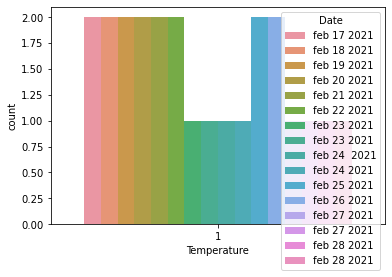

In [19]:
sns.countplot("Temperature",hue='Date',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Speed', ylabel='count'>

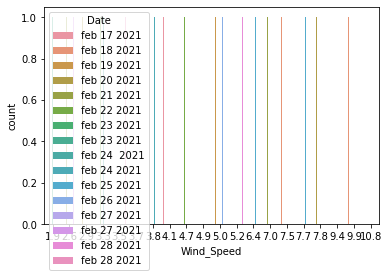

In [20]:
sns.countplot("Wind_Speed",hue="Date",data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind_Direction', ylabel='count'>

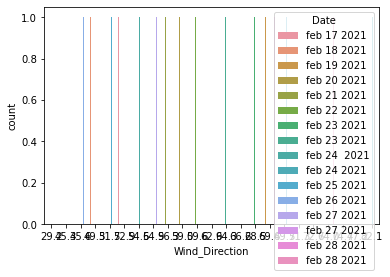

In [21]:
sns.countplot("Wind_Direction",hue='Date',data=df)

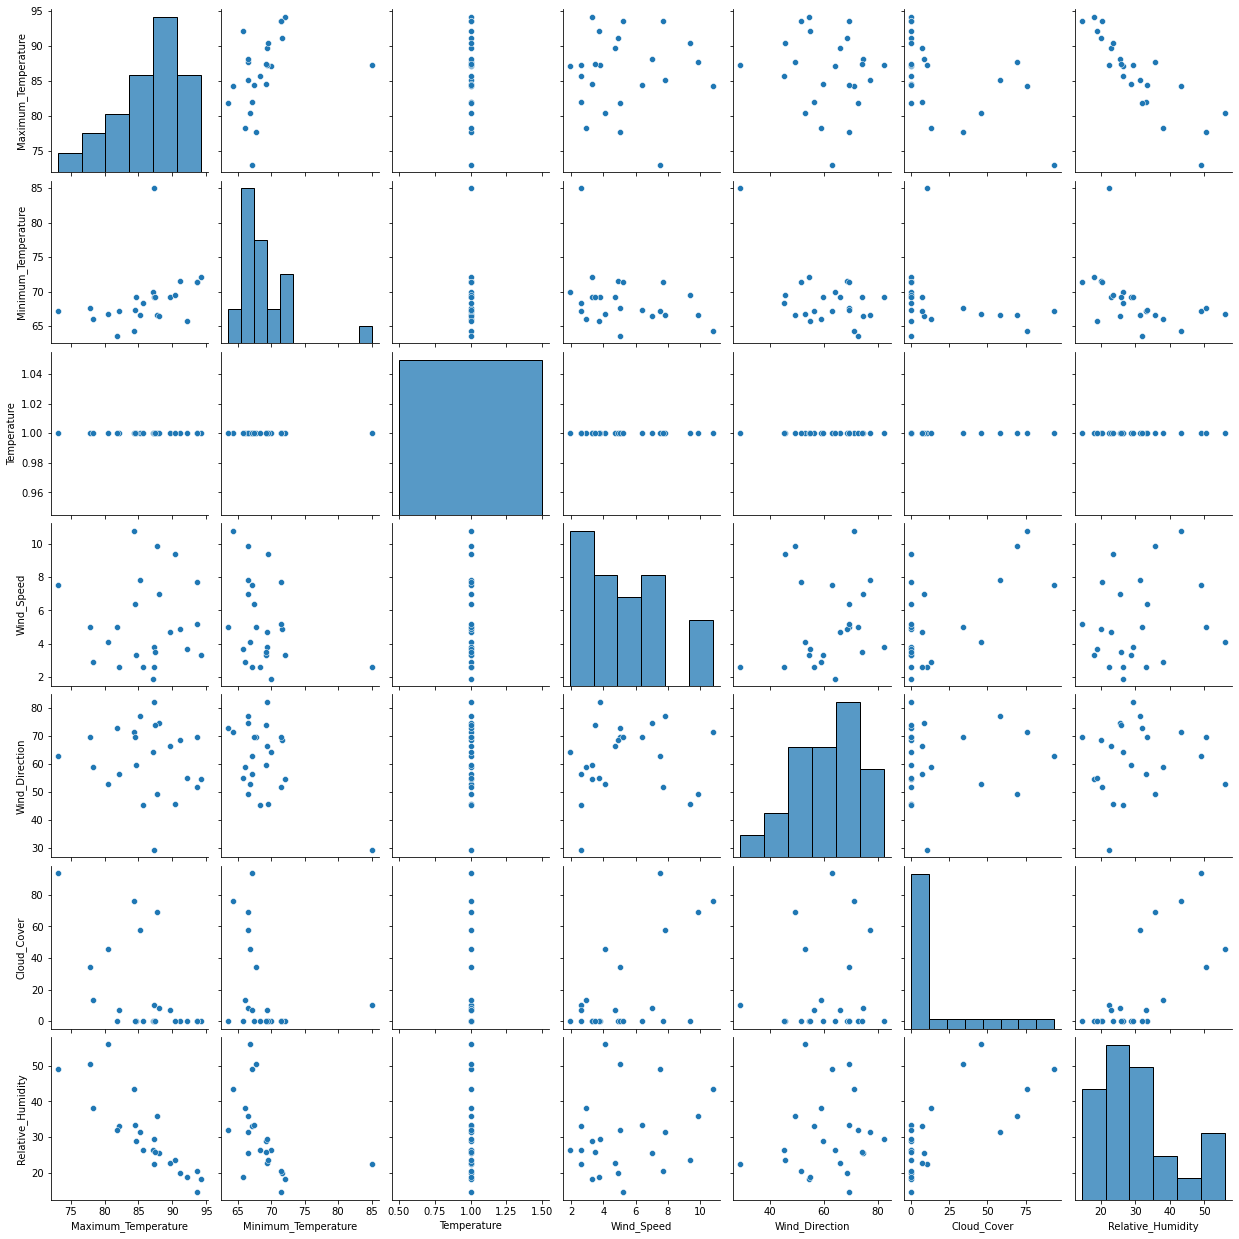

In [22]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


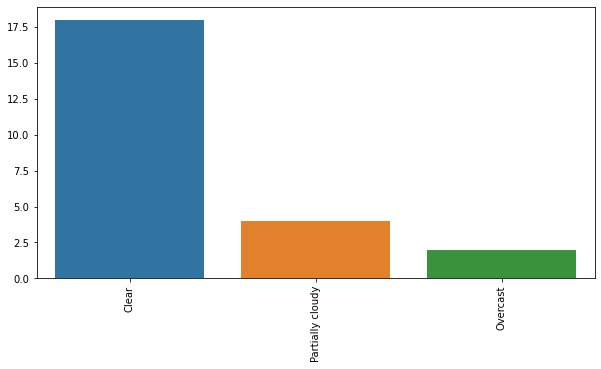

In [26]:
plt.figure(figsize=(10,5))
x = df['Conditions'].value_counts().values[:25]
y = df['Conditions'].value_counts().index[:25]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

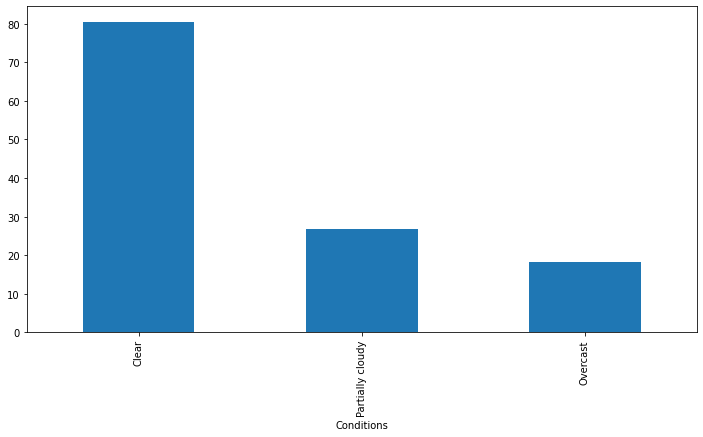

In [27]:
plt.figure(figsize=(12,6))
df.groupby('Conditions')['Wind_Speed'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()